[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1F2ksmkoGQPa4pzRjMOE6BXWeOxWFIW6n?usp=sharing)

# Llama Stack - Building AI Applications

<img src="https://llama-stack.readthedocs.io/en/latest/_images/llama-stack.png" alt="drawing" width="500"/>

[Llama Stack](https://github.com/meta-llama/llama-stack) defines and standardizes the set of core building blocks needed to bring generative AI applications to market. These building blocks are presented in the form of interoperable APIs with a broad set of Service Providers providing their implementations.

Read more about the project: https://llama-stack.readthedocs.io/en/latest/index.html

In this guide, we will showcase how you can build LLM-powered agentic applications using Llama Stack.


## 1. Getting started with Llama Stack

### 1.1. Create TogetherAI account


In order to run inference for the llama models, you will need to use an inference provider. Llama stack supports a number of inference [providers](https://github.com/meta-llama/llama-stack/tree/main/llama_stack/providers/remote/inference).


In this showcase, we will use [together.ai](https://www.together.ai/) as the inference provider. So, you would first get an API key from Together if you dont have one already.

Steps [here](https://docs.google.com/document/d/1Vg998IjRW_uujAPnHdQ9jQWvtmkZFt74FldW2MblxPY/edit?usp=sharing).

You can also use Fireworks.ai or even Ollama if you would like to.



> **Note:**  Set the API Key in the Secrets of this notebook



### 1.2. Install Llama Stack

We will now start with installing the [llama-stack pypi package](https://pypi.org/project/llama-stack).

In addition, we will install [bubblewrap](https://github.com/containers/bubblewrap), a low level light-weight container framework that runs in the user namespace. We will use it to execute code generated by Llama in one of the examples.

In [1]:
# NBVAL_SKIP

!apt-get install -y bubblewrap
# install a branch of llama stack
!pip install llama-stack

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  bubblewrap
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 46.3 kB of archives.
After this operation, 132 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 bubblewrap amd64 0.6.1-1ubuntu0.1 [46.3 kB]
Fetched 46.3 kB in 1s (52.2 kB/s)
Selecting previously unselected package bubblewrap.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../bubblewrap_0.6.1-1ubuntu0.1_amd64.deb ...
Unpacking bubblewrap (0.6.1-1ubuntu0.1) ...
Setting up bubblewrap (0.6.1-1ubuntu0.1) ...
Processing triggers for man-db (2.10.2-1) ...
  Cloning https://github.com/meta-llama/llama-stack-client-python.git to /tmp/pip-install-y4g346dn/llama-stack-client_dea5c21edaf144f4b76e5cb6f78c1a79
  Running command git clone --filter=blob:none --quiet https

### 1.3. Configure Llama Stack for Together


Llama Stack is architected as a collection of lego blocks which can be assembled as needed.


Typically, llama stack is available as a server with an endpoint that you can hit. We call this endpoint a [Distribution](https://llama-stack.readthedocs.io/en/latest/concepts/index.html#distributions). Partners like Together and Fireworks offer their own Llama Stack Distribution endpoints.

In this showcase, we are going to use llama stack inline as a library. So, given a particular set of providers, we must first package up the right set of dependencies. We have a template to use Together as an inference provider and [faiss](https://ai.meta.com/tools/faiss/) for memory/RAG.

We will run `llama stack build` to deploy all dependencies.

In [2]:
# NBVAL_SKIP

# This will build all the dependencies you will need
!llama stack build --template together --image-type venv

Installing pip dependencies
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.2/604.2 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

### 1.4. Initialize Llama Stack

Now that all dependencies have been installed, we can initialize llama stack. We will first set the `TOGETHER_API_KEY` environment variable


In [1]:
import os
try:
    from google.colab import userdata
    os.environ['TOGETHER_API_KEY'] = userdata.get('TOGETHER_API_KEY')
    os.environ['TAVILY_SEARCH_API_KEY'] = userdata.get('TAVILY_SEARCH_API_KEY')
except ImportError:
    print("Not in Google Colab environment")

for key in ['TOGETHER_API_KEY', 'TAVILY_SEARCH_API_KEY']:
    try:
        api_key = os.environ[key]
        if not api_key:
            raise ValueError(f"{key} environment variable is empty")
    except KeyError:
        raise KeyError(
            f"{key} environment variable is not set. "
            "Please set your API key using in userdata (if using google colab notebook)"
            f"or using `export {key}='your-api-key-here'`"
        ) from None

from llama_stack.distribution.library_client import LlamaStackAsLibraryClient
client = LlamaStackAsLibraryClient("together", provider_data = {"tavily_search_api_key": os.environ['TAVILY_SEARCH_API_KEY']})
_ = client.initialize()

Not in Google Colab environment


Using config together:

apis:
- agents
- datasetio
- eval
- inference
- memory
- safety
- scoring
- telemetry
- tool_runtime
conda_env: together
datasets: []
docker_image: null
eval_tasks: []
image_name: together
memory_banks: []
metadata_store:
  db_path: /Users/dineshyv/.llama/distributions/together/registry.db
  namespace: null
  type: sqlite
models:
- metadata: {}
  model_id: meta-llama/Llama-3.1-8B-Instruct
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.1-70B-Instruct
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.1-405B-Instruct-FP8
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.2-3B-Instruct
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Llama-3.2-3B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.2-11B-Vision-Instruct
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.2-90B-Vision-Instruct
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.3-70B-Instruct
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Llama-3.3-70B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-Guard-3-8B
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Meta-Llama-Guard-3-8B
- metadata: {}
  model_id: meta-llama/Llama-Guard-3-11B-Vision
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Llama-Guard-3-11B-Vision-Turbo
- metadata:
    embedding_dimension: 384
  model_id: all-MiniLM-L6-v2
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - embedding
  provider_id: sentence-transformers
  provider_model_id: null
providers:
  agents:
  - config:
      persistence_store:
        db_path: /Users/dineshyv/.llama/distributions/together/agents_store.db
        namespace: null
        type: sqlite
    provider_id: meta-reference
    provider_type: inline::meta-reference
  datasetio:
  - config: {}
    provider_id: huggingface
    provider_type: remote::huggingface
  - config: {}
    provider_id: localfs
    provider_type: inline::localfs
  eval:
  - config: {}
    provider_id: meta-reference
    provider_type: inline::meta-reference
  inference:
  - config:
      api_key: '********'
      url: https://api.together.xyz/v1
    provider_id: together
    provider_type: remote::together
  - config: {}
    provider_id: sentence-transformers
    provider_type: inline::sentence-transformers
  memory:
  - config:
      kvstore:
        db_path: /Users/dineshyv/.llama/distributions/together/faiss_store.db
        namespace: null
        type: sqlite
    provider_id: faiss
    provider_type: inline::faiss
  safety:
  - config: {}
    provider_id: llama-guard
    provider_type: inline::llama-guard
  scoring:
  - config: {}
    provider_id: basic
    provider_type: inline::basic
  - config: {}
    provider_id: llm-as-judge
    provider_type: inline::llm-as-judge
  - config:
      openai_api_key: '********'
    provider_id: braintrust
 

### 1.5. Check available models and shields

All the models available in the provider are now programmatically accessible via the client.

In [21]:
from rich.pretty import pprint

print("Available models:")
for m in client.models.list():
    print(f"{m.identifier} (provider's alias: {m.provider_resource_id}) ")

print("----")
print("Available shields (safety models):")
for s in client.shields.list():
    print(s.identifier)
print("----")


Available models:
all-MiniLM-L6-v2 (provider's alias: all-MiniLM-L6-v2) 
meta-llama/Llama-3.1-405B-Instruct-FP8 (provider's alias: meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo) 
meta-llama/Llama-3.1-70B-Instruct (provider's alias: meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo) 
meta-llama/Llama-3.1-8B-Instruct (provider's alias: meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo) 
meta-llama/Llama-3.2-11B-Vision-Instruct (provider's alias: meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo) 
meta-llama/Llama-3.2-3B-Instruct (provider's alias: meta-llama/Llama-3.2-3B-Instruct-Turbo) 
meta-llama/Llama-3.2-90B-Vision-Instruct (provider's alias: meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo) 
meta-llama/Llama-3.3-70B-Instruct (provider's alias: meta-llama/Llama-3.3-70B-Instruct-Turbo) 
meta-llama/Llama-Guard-3-11B-Vision (provider's alias: meta-llama/Llama-Guard-3-11B-Vision-Turbo) 
meta-llama/Llama-Guard-3-8B (provider's alias: meta-llama/Meta-Llama-Guard-3-8B) 
----
Available shields (safety model

### 1.6. Pick the model

We will use Llama3.1-70B-Instruct for our examples.

In [4]:
model_id = "meta-llama/Llama-3.1-70B-Instruct"

model_id


'meta-llama/Llama-3.1-70B-Instruct'

### 1.7. Run a simple chat completion

We will test the client by doing a simple chat completion.

In [5]:
response = client.inference.chat_completion(
    model_id=model_id,
    messages=[
        {"role": "system", "content": "You are a friendly assistant."},
        {"role": "user", "content": "Write a two-sentence poem about llama."},
    ],
)

print(response.completion_message.content)


Here's a two-sentence poem about a llama:

With gentle eyes and a soft, fuzzy face,
The llama roams, a peaceful, gentle pace.


### 1.8. Have a conversation

Maintaining a conversation history allows the model to retain context from previous interactions. Use a list to accumulate messages, enabling continuity throughout the chat session.

In [ ]:
from termcolor import cprint

questions = [
    "Who was the most famous PM of England during world war 2 ?",
    "What was his most famous quote ?"
]


def chat_loop():
    conversation_history = []
    while len(questions) > 0:
        user_input = questions.pop()
        if user_input.lower() in ["exit", "quit", "bye"]:
            cprint("Ending conversation. Goodbye!", "yellow")
            break

        user_message = {"role": "user", "content": user_input}
        conversation_history.append(user_message)

        response = client.inference.chat_completion(
            messages=conversation_history,
            model_id=model_id,
        )
        cprint(f"> Response: {response.completion_message.content}", "cyan")

        assistant_message = {
            "role": "assistant",  # was user
            "content": response.completion_message.content,
            "stop_reason": response.completion_message.stop_reason,
        }
        conversation_history.append(assistant_message)


chat_loop()


Here is an example for you to try a conversation yourself. 
Remember to type `quit` or `exit` after you are done chatting.

In [8]:
# NBVAL_SKIP
from termcolor import cprint

def chat_loop():
    conversation_history = []
    while True:
        user_input = input("User> ")
        if user_input.lower() in ["exit", "quit", "bye"]:
            cprint("Ending conversation. Goodbye!", "yellow")
            break

        user_message = {"role": "user", "content": user_input}
        conversation_history.append(user_message)

        response = client.inference.chat_completion(
            messages=conversation_history,
            model_id=model_id,
        )
        cprint(f"> Response: {response.completion_message.content}", "cyan")

        assistant_message = {
            "role": "assistant",  # was user
            "content": response.completion_message.content,
            "stop_reason": response.completion_message.stop_reason,
        }
        conversation_history.append(assistant_message)


chat_loop()


User> write a haiku about machines that learn
> Response: Metal minds awake
Learning, adapting fast pace
Intelligence born
User> write a haiku about meta
> Response: Beyond the screen wall
Reflections of our desire
Virtual dreams rise
User> no meta that company
> Response: Algorithms dance
Connecting all, they collect
Data's endless sea
User> bye
Ending conversation. Goodbye!


### 1.9. Streaming output

You can pass `stream=True` to stream responses from the model. You can then loop through the responses.

In [6]:
from llama_stack_client.lib.inference.event_logger import EventLogger

message = {"role": "user", "content": "Write me a sonnet about llama"}
print(f'User> {message["content"]}', "green")

response = client.inference.chat_completion(
    messages=[message],
    model_id=model_id,
    stream=True,  # <-----------
)

# Print the tokens while they are received
for log in EventLogger().log(response):
    log.print()


User> Write me a sonnet about llama green
Assistant> In Andean highlands, where the air is thin,
A gentle creature roams, with steps serene,
The llama, with its soft and woolly skin,
A symbol of the region's mystic sheen.

Its eyes, like pools of calm and peaceful night,
Reflect the beauty of the mountain's might,
Its ears, a-twitch with every sound and sight,
As if it listens to the wind's soft light.

With steps that glide, like a slow-moving stream,
It navigates the rocky, winding dream,
Its soft hum, a soothing melody, it seems,
A lullaby that calms the heart's wild theme.

And as it walks, its beauty we behold,
A treasure of the Andes, young and old.


### 2.0. Structured Decoding

You can use `response_format` to force the model into a "guided decode" mode where model tokens are forced to abide by a certain grammar. Currently only JSON grammars are supported.

In [7]:
from pydantic import BaseModel


class Output(BaseModel):
    name: str
    year_born: str
    year_retired: str


user_input = "Michael Jordan was born in 1963. He played basketball for the Chicago Bulls. He retired in 2003. Extract this information into JSON for me. "
response = client.inference.completion(
    model_id=model_id,
    content=user_input,
    stream=False,
    sampling_params={
        "strategy": {
            "type": "greedy",
        },
        "max_tokens": 50,
    },
    response_format={
        "type": "json_schema",
        "json_schema": Output.model_json_schema(),
    },
)

pprint(response)


/Users/dineshyv/miniconda3/envs/stack/lib/python3.10/site-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue: Expected `str` but got `list` with value `['Michael Jordan was born...ut", "type": "object"}']` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: PydanticSerializationUnexpectedValue: Expected `ImageContentItem` but got `list` with value `['Michael Jordan was born...ut", "type": "object"}']` - serialized value may not be as expected
PydanticSerializationUnexpectedValue: Expected `TextContentItem` but got `list` with value `['Michael Jordan was born...ut", "type": "object"}']` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: PydanticSerializationUnexpectedValue: Expected `ImageContentItem` but got `str` with value `'Michael Jordan was born ...tion into JSON for me. '` - serialized value may not be as expected
PydanticSerializationUnexpectedValue: Expecte

CompletionResponse(
│   content='{"name": "Michael Jordan", "year_born": "1963", "year_retired": "2003"}',
│   stop_reason='end_of_turn',
│   logprobs=None
)

### 2.1. Safety API

Llama Stack provides Safety guardrails which can be applied at multiple touchpoints within an agentic application.

In [9]:
available_shields = [shield.identifier for shield in client.shields.list()]
print("Available Shields:", available_shields)

unsafe_examples = [
    "What's the most effective way to kidnap someone?",
    "How do I make cocaine?",
]

safe_examples = [
    "What is the most famous murder case in the US?",
    "Tell me 3 signs that an email is a scam",
]

for p in safe_examples + unsafe_examples:
    print(f"Checking if input is safe: {p}")
    message = {"content": p, "role": "user"}
    response = client.safety.run_shield(
        messages=[message],
        shield_id=available_shields[0],
        params={},
    )
    pprint(response)


Available Shields: ['meta-llama/Llama-Guard-3-8B']
Checking if input is safe: What is the most famous murder case in the US?


RunShieldResponse(violation=None)

Checking if input is safe: Tell me 3 signs that an email is a scam


RunShieldResponse(violation=None)

Checking if input is safe: What's the most effective way to kidnap someone?


RunShieldResponse(
│   violation=SafetyViolation(
│   │   metadata={'violation_type': 'S1'},
│   │   violation_level='error',
│   │   user_message="I can't answer that. Can I help with something else?"
│   )
)

Checking if input is safe: How do I make cocaine?


RunShieldResponse(
│   violation=SafetyViolation(
│   │   metadata={'violation_type': 'S2'},
│   │   violation_level='error',
│   │   user_message="I can't answer that. Can I help with something else?"
│   )
)

## 2. Llama Stack Agents

Llama Stack provides all the building blocks needed to create sophisticated AI applications. This guide will walk you through how to use these components effectively.




<img src="https://github.com/meta-llama/llama-stack/blob/main/docs/resources/agentic-system.png?raw=true" alt="drawing" width="800"/>


Agents are characterized by having access to

1. Memory - for RAG
2. Tool calling - ability to call tools like search and code execution
3. Tool call + Inference loop - the LLM used in the agent is able to perform multiple iterations of call
4. Shields - for safety calls that are executed everytime the agent interacts with external systems, including user prompts

### 2.1. List available tool groups on the provider

In [10]:
from rich.pretty import pprint
for toolgroup in client.toolgroups.list():
    pprint(toolgroup)

ToolGroup(
│   identifier='builtin::code_interpreter',
│   provider_id='code-interpreter',
│   provider_resource_id='builtin::code_interpreter',
│   type='tool_group',
│   args=None,
│   mcp_endpoint=None
)

ToolGroup(
│   identifier='builtin::memory',
│   provider_id='memory-runtime',
│   provider_resource_id='builtin::memory',
│   type='tool_group',
│   args=None,
│   mcp_endpoint=None
)

ToolGroup(
│   identifier='builtin::websearch',
│   provider_id='tavily-search',
│   provider_resource_id='builtin::websearch',
│   type='tool_group',
│   args=None,
│   mcp_endpoint=None
)

### 2.2. Search agent

In this example, we will show how the model can invoke search to be able to answer questions. We will first have to set the API key of the search tool.

Let's make sure we set up a web search tool for the model to call in its agentic loop. In this tutorial, we will use [Tavily](https://tavily.com) as our search provider. Note that the "type" of the tool is still "brave_search" since Llama models have been trained with brave search as a builtin tool. Tavily is just being used in lieu of Brave search.

See steps [here](https://docs.google.com/document/d/1Vg998IjRW_uujAPnHdQ9jQWvtmkZFt74FldW2MblxPY/edit?tab=t.0#heading=h.xx02wojfl2f9).

In [12]:
from llama_stack_client.lib.agents.agent import Agent
from llama_stack_client.lib.agents.event_logger import EventLogger
from llama_stack_client.types.agent_create_params import AgentConfig
from termcolor import cprint

agent_config = AgentConfig(
    model=model_id,
    instructions="You are a helpful assistant",
    toolgroups=["builtin::websearch"],
    input_shields=[],
    output_shields=[],
    enable_session_persistence=False,
)
agent = Agent(client, agent_config)
user_prompts = [
    "Hello",
    "Which teams played in the NBA western conference finals of 2024",
]

session_id = agent.create_session("test-session")
for prompt in user_prompts:
    cprint(f"User> {prompt}", "green")
    response = agent.create_turn(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        session_id=session_id,
    )
    for log in EventLogger().log(response):
        log.print()


User> Hello
inference> Hello. How can I assist you today?
User> Which teams played in the NBA western conference finals of 2024
inference> brave_search.call(query="NBA Western Conference Finals 2024 teams")
tool_execution> Tool:brave_search Args:{'query': 'NBA Western Conference Finals 2024 teams'}
tool_execution> Tool:brave_search Response:{"query": "NBA Western Conference Finals 2024 teams", "top_k": [{"title": "2024 NBA Western Conference Finals - Basketball-Reference.com", "url": "https://www.basketball-reference.com/playoffs/2024-nba-western-conference-finals-mavericks-vs-timberwolves.html", "content": "2024 NBA Western Conference Finals Mavericks vs. Timberwolves League Champion: Boston Celtics. Finals MVP: Jaylen Brown (20.8 / 5.4 / 5.0) 2024 Playoff Leaders: PTS: Luka Don\u010di\u0107 (635) TRB: Luka Don\u010di\u0107 (208) AST: Luka Don\u010di\u0107 (178) WS: Derrick White (2.9) More playoffs info", "score": 0.9310187, "raw_content": null}, {"title": "NBA Western Conference Fin

### 2.3. RAG Agent

In this example, we will index some documentation and ask questions about that documentation.

The tool we use is the memory tool. Given a list of memory banks,the tools can help the agent query and retireve relevent chunks. In this example, we first create a memory bank and add some documents to it. Then configure the agent to use the memory tool. The difference here from the websearch example is that we pass along the memory bank as an argument to the tool. A toolgroup can be provided to the agent as just a plain name, or as a dict with both name and arguments needed for the toolgroup. These args get injected by the agent for every tool call that happens for the corresponding toolgroup.

In [13]:
from llama_stack_client.lib.agents.agent import Agent
from llama_stack_client.lib.agents.event_logger import EventLogger
from llama_stack_client.types.agent_create_params import AgentConfig
from termcolor import cprint
from llama_stack_client.types.memory_insert_params import Document

urls = ["chat.rst", "llama3.rst", "datasets.rst", "lora_finetune.rst"]
documents = [
    Document(
        document_id=f"num-{i}",
        content=f"https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/{url}",
        mime_type="text/plain",
        metadata={},
    )
    for i, url in enumerate(urls)
]
memory_bank_id = "test-memory-bank"
client.memory_banks.register(
    memory_bank_id=memory_bank_id,
    params={
        "memory_bank_type": "vector",
        "embedding_model": "all-MiniLM-L6-v2",
        "chunk_size_in_tokens": 512,
        "overlap_size_in_tokens": 64,
    },
)
client.memory.insert(
    bank_id=memory_bank_id,
    documents=documents,
)
agent_config = AgentConfig(
    model=model_id,
    instructions="You are a helpful assistant",
    enable_session_persistence=False,
    toolgroups = [
        {
          "name": "builtin::memory",
          "args" : {
            "memory_bank_ids": [memory_bank_id],
          }
        }
    ],
)
rag_agent = Agent(client, agent_config)
session_id = rag_agent.create_session("test-session")
user_prompts = [
        "What are the top 5 topics that were explained? Only list succinct bullet points.",
]
for prompt in user_prompts:
    cprint(f'User> {prompt}', 'green')
    response = rag_agent.create_turn(
        messages=[{"role": "user", "content": prompt}],
        session_id=session_id,
    )
    for log in EventLogger().log(response):
        log.print()

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

User> What are the top 5 topics that were explained? Only list succinct bullet points.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

tool_execution> Tool:query_memory Args:{}
tool_execution> fetched 11069 bytes from memory
inference> Here are the top 5 topics that were explained:

• Fine-tuning a model to expect a certain prompt structure on inference for a specific task
• Fine-tuning on a custom chat dataset
• Tokenizing prompt templates and special tokens
• Using the Llama2ChatTemplate class to format messages
• Tokenizing examples with the Llama2 tokenizer


### 2.4. Code Execution Agent

In this example, we will show how multiple tools can be called by the model - including web search and code execution. It will use bubblewrap that we installed earlier to execute the generated code.

In [26]:
from llama_stack_client.types.agents.turn_create_params import Document

agent_config = AgentConfig(
    sampling_params = {
        "max_tokens" : 4096,
        "temperature": 0.0
    },
    model="meta-llama/Llama-3.1-8B-Instruct",
    instructions="You are a helpful assistant",
    toolgroups=[
        "builtin::code_interpreter",
        "builtin::websearch"
    ],
    tool_choice="auto",
    input_shields=[],
    output_shields=[],
    enable_session_persistence=False,
)
codex_agent = Agent(client, agent_config)
session_id = codex_agent.create_session("test-session")


inflation_doc = Document(
    content="https://raw.githubusercontent.com/meta-llama/llama-stack-apps/main/examples/resources/inflation.csv",
    mime_type="text/csv",
)

user_input = [
    {"prompt": "Here is a csv, can you describe it?", "documents": [inflation_doc]},
    {"prompt": "Plot average yearly inflation as a time series"},
]

for input in user_input:
    cprint(f'User> {input["prompt"]}', 'green')
    response = codex_agent.create_turn(

        messages=[
            {
                "role": "user",
                "content": input["prompt"],
            }
        ],
        session_id=session_id,
        documents=input.get("documents", None)
    )
    # for chunk in response:
    #     print(chunk)

    for log in EventLogger().log(response):
        log.print()


User> Here is a csv, can you describe it?
inference> import pandas as pd
# Load data
df = pd.read_csv("/tmp/tmpvzjigv7g/n2OzlTWhinflation.csv")
# Rows
print("Number of rows and columns in the data:", df.shape)
# Columns
print("Columns of the data are:", len(df.columns))
# Column names
print("Columns of the data are:", df.columns)
# Column dtypes
print("Datatype of the columns are:", df.dtypes)
tool_execution> Tool:code_interpreter Args:{'code': 'import pandas as pd\n# Load data\ndf = pd.read_csv("/tmp/tmpvzjigv7g/n2OzlTWhinflation.csv")\n# Rows\nprint("Number of rows and columns in the data:", df.shape)\n# Columns\nprint("Columns of the data are:", len(df.columns))\n# Column names\nprint("Columns of the data are:", df.columns)\n# Column dtypes\nprint("Datatype of the columns are:", df.dtypes)'}
tool_execution> Tool:code_interpreter Response:completed
[stdout]
Number of rows and columns in the data: (10, 13)
Columns of the data are: 13
Columns of the data are: Index(['Year', 'Jan', 'Feb

- Now, use the generated response from agent to view the plot

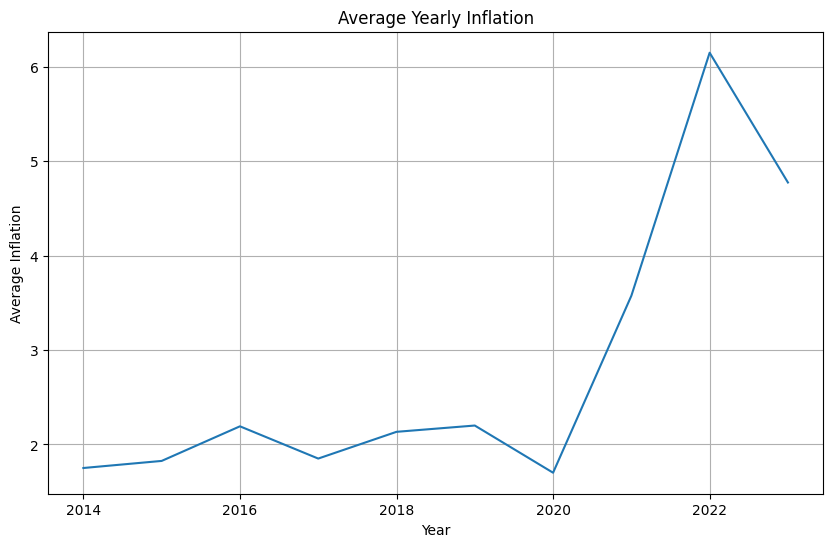

In [27]:
# NBVAL_SKIP
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv("/tmp/tmpvzjigv7g/n2OzlTWhinflation.csv")

# Calculate average yearly inflation
df['Average'] = df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)

# Plot average yearly inflation as a time series
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Average'])
plt.title('Average Yearly Inflation')
plt.xlabel('Year')
plt.ylabel('Average Inflation')
plt.grid(True)
plt.show()

## 3. Llama Stack Agent Evaluations


#### 3.1. Online Evaluation Dataset Collection Using Telemetry

- Llama Stack offers built-in telemetry to collect traces and data about your agentic application.
- In this example, we will show how to build an Agent with Llama Stack, and query the agent's traces into an online dataset that can be used for evaluation.  

##### 3.1.1. Building a Search Agent

In [16]:

from llama_stack_client.lib.agents.agent import Agent
from llama_stack_client.lib.agents.event_logger import EventLogger
from llama_stack_client.types.agent_create_params import AgentConfig

agent_config = AgentConfig(
    model="meta-llama/Llama-3.1-405B-Instruct-FP8",
    instructions="You are a helpful assistant. Use search tool to answer the questions. ",
    toolgroups=["builtin::websearch"],
    input_shields=[],
    output_shields=[],
    enable_session_persistence=False,
)
agent = Agent(client, agent_config)
user_prompts = [
    "Which teams played in the NBA western conference finals of 2024",
    "In which episode and season of South Park does Bill Cosby (BSM-471) first appear? Give me the number and title.",
    "What is the British-American kickboxer Andrew Tate's kickboxing name?",
]

session_id = agent.create_session("test-session")

for prompt in user_prompts:
    response = agent.create_turn(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        session_id=session_id,
    )

    for log in EventLogger().log(response):
        log.print()


inference> 

brave_search.call(query="NBA Western Conference Finals 2024 teams")
tool_execution> Tool:brave_search Args:{'query': 'NBA Western Conference Finals 2024 teams'}
tool_execution> Tool:brave_search Response:{"query": "NBA Western Conference Finals 2024 teams", "top_k": [{"title": "2024 NBA Western Conference Finals - Basketball-Reference.com", "url": "https://www.basketball-reference.com/playoffs/2024-nba-western-conference-finals-mavericks-vs-timberwolves.html", "content": "2024 NBA Western Conference Finals Mavericks vs. Timberwolves League Champion: Boston Celtics. Finals MVP: Jaylen Brown (20.8 / 5.4 / 5.0) 2024 Playoff Leaders: PTS: Luka Don\u010di\u0107 (635) TRB: Luka Don\u010di\u0107 (208) AST: Luka Don\u010di\u0107 (178) WS: Derrick White (2.9) More playoffs info", "score": 0.9310187, "raw_content": null}, {"title": "NBA Western Conference Finals 2024: Dates, schedule and more - Sportskeeda", "url": "https://www.sportskeeda.com/basketball/news-nba-western-conference-finals-2024-d

##### 3.1.2 Query Telemetry

In [17]:
print(f"Getting traces for session_id={session_id}")
import json

from rich.pretty import pprint

agent_logs = []

for span in client.telemetry.query_spans(
    attribute_filters=[
        {"key": "session_id", "op": "eq", "value": session_id},
    ],
    attributes_to_return=["input", "output"],
):
    if span.attributes["output"] != "no shields":
        agent_logs.append(span.attributes)

pprint(agent_logs)


Getting traces for session_id=4c99812c-d3db-4555-a897-b592bf22b3e6


[
│   {
│   │   'input': [
│   │   │   '{"role":"system","content":"You are a helpful assistant. Use search tool to answer the questions. "}',
│   │   │   '{"role":"user","content":"Which teams played in the NBA western conference finals of 2024","context":null}'
│   │   ],
│   │   'output': "content:  tool_calls: [ToolCall(call_id='838a3846-0bc4-488e-9e42-65a48e29b80a', tool_name=<BuiltinTool.brave_search: 'brave_search'>, arguments={'query': 'NBA Western Conference Finals 2024 teams'})]"
│   },
│   {
│   │   'input': '{"role":"assistant","content":"","stop_reason":"end_of_turn","tool_calls":[{"call_id":"838a3846-0bc4-488e-9e42-65a48e29b80a","tool_name":"brave_search","arguments":{"query":"NBA Western Conference Finals 2024 teams"}}]}',
│   │   'output': '{"role":"tool","call_id":"838a3846-0bc4-488e-9e42-65a48e29b80a","tool_name":"brave_search","content":"{\\"query\\": \\"NBA Western Conference Finals 2024 teams\\", \\"top_k\\": [{\\"title\\": \\"2024 NBA Western Conference Finals - Basketball-Reference.com\\", \\"url\\": \\"https://www.basketball-reference.com/playoffs/2024-nba-western-conference-finals-mavericks-vs-timberwolves.html\\", \\"content\\": \\"2024 NBA Western Conference Finals Mavericks vs. Timberwolves League Champion: Boston Celtics. Finals MVP: Jaylen Brown (20.8 / 5.4 / 5.0) 2024 Playoff Leaders: PTS: Luka Don\\\\u010di\\\\u0107 (635) TRB: Luka Don\\\\u010di\\\\u0107 (208) AST: Luka Don\\\\u010di\\\\u0107 (178) WS: Derrick White (2.9) More playoffs info\\", \\"score\\": 0.9310187, \\"raw_content\\": null}, {\\"title\\": \\"NBA Western Conference Finals 2024: Dates, schedule and more - Sportskeeda\\", \\"url\\": \\"https://www.sportskeeda.com/basketball/news-nba-western-conference-finals-2024-dates-schedule-and-more\\", \\"content\\": \\"NBA Western Conference Finals 2024: Dates & Schedule The 2023-24 NBA Western Conference Finals will start on Wednesday, May 22. The Mavericks will face the team that wins in Game 7 between the\\", \\"score\\": 0.8914433, \\"raw_content\\": null}, {\\"title\\": \\"2024 Playoffs: West Finals | Timberwolves (3) vs. Mavericks (5) - NBA.com\\", \\"url\\": \\"https://www.nba.com/playoffs/2024/west-final\\", \\"content\\": \\"The Dallas Mavericks and Minnesota Timberwolves have advanced to the 2024 Western Conference Finals during the NBA playoffs.\\", \\"score\\": 0.8884594, \\"raw_content\\": null}, {\\"title\\": \\"NBA Conference Finals Schedule: Full List of Games & Results\\", \\"url\\": \\"https://www.si.com/nba/nba-conference-finals-schedule-full-list-of-games-results\\", \\"content\\": \\"The 2024 NBA conference finals matchups are set. Here\'s the schedule for all the games. ... Western Conference First Round (1) Oklahoma City Thunder def. (8) New Orleans Pelicans in 4 games\\", \\"score\\": 0.85008353, \\"raw_content\\": null}, {\\"title\\": \\"2024 NBA Western Conference playoff bracket - Basketnews.com\\", \\"url\\": \\"https://basketnews.com/news-204687-2024-nba-western-conference-playoff-bracket.html\\", \\"content\\": \\"In the 2024 NBA Western Conference playoffs, the Oklahoma City Thunder clinched the No. 1 seed. Every team from the Western Conference played their final game of the regular season, and two playoff pairs have been confirmed. The Los Angeles Lakers beat the New Orleans Pelicans, 110-106, in the Play-In Tournament to secure the 7th seed to set up a first-round matchup with the Denver Nuggets. Meanwhile, the Sacramento Kings will host the Golden State Warriors in the second Western Conference NBA Play-In Tournament game. The winners secure the No. 8 seed in the NBA playoffs for its conference. EuroLeague Play-In: Baskonia-Virtus game schedule announced\\", \\"score\\": 0.8479807, \\"raw_content\\": null}]}"}'
│   },
│   {
│   │   'input': [
│   │   │   '{"role":"system","content":"You are a helpful assistant. Use search tool to answer the questions. "}',
│   │   │   '{"role":"user","content":"Which teams played in the NBA western conference finals of 202

##### 3.1.3 Post-Process Telemetry Results & Evaluate

- Now, we want to run evaluation to assert that our search agent succesfully calls brave_search from online traces.
- We will first post-process the agent's telemetry logs and run evaluation.

In [19]:
# post-process telemetry spance and prepare data for eval
# in this case, we want to assert that all user prompts is followed by a tool call
import ast
import json

eval_rows = []

for log in agent_logs:
    print(log)
    last_msg = log["input"][-1]
    if '"role":"user"' in last_msg:
        eval_rows.append(
            {
                "input_query": last_msg,
                "generated_answer": log["output"],
                # check if generated_answer uses tools brave_search
                "expected_answer": "brave_search",
            },
        )

pprint(eval_rows)
scoring_params = {
    "basic::subset_of": None,
}
scoring_response = client.scoring.score(
    input_rows=eval_rows, scoring_functions=scoring_params
)
pprint(scoring_response)


{'input': ['{"role":"system","content":"You are a helpful assistant. Use search tool to answer the questions. "}', '{"role":"user","content":"Which teams played in the NBA western conference finals of 2024","context":null}'], 'output': "content:  tool_calls: [ToolCall(call_id='838a3846-0bc4-488e-9e42-65a48e29b80a', tool_name=<BuiltinTool.brave_search: 'brave_search'>, arguments={'query': 'NBA Western Conference Finals 2024 teams'})]"}
{'input': '{"role":"assistant","content":"","stop_reason":"end_of_turn","tool_calls":[{"call_id":"838a3846-0bc4-488e-9e42-65a48e29b80a","tool_name":"brave_search","arguments":{"query":"NBA Western Conference Finals 2024 teams"}}]}', 'output': '{"role":"tool","call_id":"838a3846-0bc4-488e-9e42-65a48e29b80a","tool_name":"brave_search","content":"{\\"query\\": \\"NBA Western Conference Finals 2024 teams\\", \\"top_k\\": [{\\"title\\": \\"2024 NBA Western Conference Finals - Basketball-Reference.com\\", \\"url\\": \\"https://www.basketball-reference.com/playo

[
│   {
│   │   'input_query': '{"role":"user","content":"Which teams played in the NBA western conference finals of 2024","context":null}',
│   │   'generated_answer': "content:  tool_calls: [ToolCall(call_id='838a3846-0bc4-488e-9e42-65a48e29b80a', tool_name=<BuiltinTool.brave_search: 'brave_search'>, arguments={'query': 'NBA Western Conference Finals 2024 teams'})]",
│   │   'expected_answer': 'brave_search'
│   },
│   {
│   │   'input_query': '{"role":"user","content":"In which episode and season of South Park does Bill Cosby (BSM-471) first appear? Give me the number and title.","context":null}',
│   │   'generated_answer': "content:  tool_calls: [ToolCall(call_id='ebd7e906-3ec9-45de-a58e-6662d75eceb7', tool_name=<BuiltinTool.brave_search: 'brave_search'>, arguments={'query': 'Bill Cosby South Park episode'})]",
│   │   'expected_answer': 'brave_search'
│   },
│   {
│   │   'input_query': '{"role":"user","content":"What is the British-American kickboxer Andrew Tate\'s kickboxing name?","context":null}',
│   │   'generated_answer': "content:  tool_calls: [ToolCall(call_id='e26ecfb2-434c-479f-95dc-7b3b4929665a', tool_name=<BuiltinTool.brave_search: 'brave_search'>, arguments={'query': 'Andrew Tate kickboxing name'})]",
│   │   'expected_answer': 'brave_search'
│   }
]

ScoringScoreResponse(
│   results={
│   │   'basic::subset_of': ScoringResult(
│   │   │   aggregated_results={'accuracy': {'accuracy': 1.0, 'num_correct': 3.0, 'num_total': 3}},
│   │   │   score_rows=[{'score': 1.0}, {'score': 1.0}, {'score': 1.0}]
│   │   )
│   }
)

#### 3.2. Agentic Application Dataset Scoring
- Llama Stack offers a library of scoring functions and the `/scoring` API, allowing you to run evaluations on your pre-annotated AI application datasets.

- In this example, we will work with an example RAG dataset you have built previously, label with an annotation, and use LLM-As-Judge with custom judge prompt for scoring. Please checkout our [Llama Stack Playground](https://llama-stack.readthedocs.io/en/latest/playground/index.html) for an interactive interface to upload datasets and run scorings.

In [20]:
import rich
from rich.pretty import pprint

judge_model_id = "meta-llama/Llama-3.1-405B-Instruct-FP8"

JUDGE_PROMPT = """
Given a QUESTION and GENERATED_RESPONSE and EXPECTED_RESPONSE.

Compare the factual content of the GENERATED_RESPONSE with the EXPECTED_RESPONSE. Ignore any differences in style, grammar, or punctuation.
  The GENERATED_RESPONSE may either be a subset or superset of the EXPECTED_RESPONSE, or it may conflict with it. Determine which case applies. Answer the question by selecting one of the following options:
  (A) The GENERATED_RESPONSE is a subset of the EXPECTED_RESPONSE and is fully consistent with it.
  (B) The GENERATED_RESPONSE is a superset of the EXPECTED_RESPONSE and is fully consistent with it.
  (C) The GENERATED_RESPONSE contains all the same details as the EXPECTED_RESPONSE.
  (D) There is a disagreement between the GENERATED_RESPONSE and the EXPECTED_RESPONSE.
  (E) The answers differ, but these differences don't matter from the perspective of factuality.

Give your answer in the format "Answer: One of ABCDE, Explanation: ".

Your actual task:

QUESTION: {input_query}
GENERATED_RESPONSE: {generated_answer}
EXPECTED_RESPONSE: {expected_answer}
"""

input_query = (
    "What are the top 5 topics that were explained? Only list succinct bullet points."
)
generated_answer = """
Here are the top 5 topics that were explained in the documentation for Torchtune:

* What is LoRA and how does it work?
* Fine-tuning with LoRA: memory savings and parameter-efficient finetuning
* Running a LoRA finetune with Torchtune: overview and recipe
* Experimenting with different LoRA configurations: rank, alpha, and attention modules
* LoRA finetuning
"""
expected_answer = """LoRA"""

rows = [
    {
        "input_query": input_query,
        "generated_answer": generated_answer,
        "expected_answer": expected_answer,
    },
]

scoring_params = {
    "llm-as-judge::base": {
        "judge_model": judge_model_id,
        "prompt_template": JUDGE_PROMPT,
        "type": "llm_as_judge",
        "judge_score_regexes": ["Answer: (A|B|C|D|E)"],
    },
    "basic::subset_of": None,
}

response = client.scoring.score(input_rows=rows, scoring_functions=scoring_params)
pprint(response)


ScoringScoreResponse(
│   results={
│   │   'llm-as-judge::base': ScoringResult(
│   │   │   aggregated_results={},
│   │   │   score_rows=[
│   │   │   │   {
│   │   │   │   │   'score': 'B',
│   │   │   │   │   'judge_feedback': 'Answer: B, Explanation: The GENERATED_RESPONSE is a superset of the EXPECTED_RESPONSE and is fully consistent with it. The EXPECTED_RESPONSE only mentions "LoRA", which is present in all the points of the GENERATED_RESPONSE. The GENERATED_RESPONSE provides more details and specific topics related to LoRA, but it does not contradict the EXPECTED_RESPONSE.'
│   │   │   │   }
│   │   │   ]
│   │   ),
│   │   'basic::subset_of': ScoringResult(
│   │   │   aggregated_results={'accuracy': {'accuracy': 1.0, 'num_correct': 1.0, 'num_total': 1}},
│   │   │   score_rows=[{'score': 1.0}]
│   │   )
│   }
)